Here's an explanation of how it works:

Database Connection:

The function starts by establishing a connection to a database using the dbConnection() function. This assumes that there is a function named dbConnection() which handles the database connection.
SQL Query and Data Retrieval:

It executes an SQL query to select the USERID, IDBUSS, and rating from a table named review. This implies that there's a table in the database named review containing user IDs, business IDs, and corresponding ratings.
Data Processing:

The retrieved data is then processed using Pandas. It creates a DataFrame df with columns named USERID, IDBUSS, and rating.
Utility Matrix:

It creates a ratings utility matrix from the DataFrame. This matrix represents users' ratings for different businesses. Rows correspond to users, columns correspond to businesses, and the values are ratings.
Matrix Transformation:

It transposes the utility matrix, effectively making businesses as rows and users as columns.
Dimensionality Reduction (SVD):

It applies Singular Value Decomposition (SVD) for dimensionality reduction. SVD is a matrix factorization technique commonly used in recommendation systems.
Correlation Matrix:

It calculates the correlation matrix from the decomposed matrix. This matrix represents the correlation between different businesses based on user ratings.
User Identification:

It identifies the index of the user in the list of businesses.
Recommendation Generation:

It generates a list of recommended businesses (Recommend) based on a correlation threshold of 0.70. This means it recommends businesses that have a high correlation with the businesses the user has interacted with.
Returning Recommendations:

Finally, it returns the top 5 recommended businesses.
This code essentially performs collaborative filtering using a dimensionality reduction technique (SVD) and correlation-based recommendation. It's important to note that collaborative filtering relies on the behavior and preferences of other users to make recommendations. It assumes that users with similar behavior will have similar preferences for businesses.

In [14]:
from flask import Flask, render_template, request, session, url_for, redirect, jsonify,session, url_for, redirect, jsonify,send_from_directory,flash
import pymysql
from werkzeug.utils import secure_filename
import pathlib
import pandas as pd
import os
import random
import glob
import geocoder
import datetime
import nltk
import requests
import json
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()
import random
import smtplib 
from email.mime.multipart import MIMEMultipart 
from email.mime.text import MIMEText 
import threading
import numpy as np
from sklearn.decomposition import TruncatedSVD
lock = threading.Lock()
import matplotlib.pyplot as plt
def dbConnection():
    connection = pymysql.connect(host="localhost", user="root", password="root", database="012-mycitypedia", autocommit=True)
    return connection


def dbClose():
    try:
        dbConnection().close()
    except:
        print("Something went wrong in Close DB Connection")
        
con = dbConnection()
cursor = con.cursor()        
        

In [15]:
USERID=1
print(USERID)
rec_lst = []
try:
    rec_lst = recommend(int(USERID))
except Exception as e:
    print(e)
    rec_lst = []
print(rec_lst) 

recomfinal_lst=[]
for k in rec_lst:
    cursor.execute('SELECT * FROM addlisting WHERE Id = %s', (str(k)))
    dowdata = cursor.fetchone()
    if dowdata != None:
        recomfinal_lst.append(dowdata)

# print(rec_lst)
print(recomfinal_lst) 


def recommend(USERID):
    conn = dbConnection()
    cur = conn.cursor()
    sql="SELECT USERID,IDBUSS,rating from review"
    cur.execute(sql)
    table_rows = cur.fetchall()
    print(table_rows)
    df = pd.DataFrame(table_rows,columns=['USERID','IDBUSS','rating'])
    #df.to_csv("Reco.csv")
    print()
    print("printign np.unique(df['IDBUSS']")
    print(np.unique(df['IDBUSS']))
    a=len(np.unique(df['IDBUSS']))

    print()
    print("printing a")
    print(a)
    print()
    df = df.astype({"USERID": int,"IDBUSS": int,"rating": int })
    ratings_utility_matrix=df.pivot_table(values='rating', index='USERID', columns='IDBUSS', fill_value=0)
    X = ratings_utility_matrix.T
    print("---------------------------")
    print(X)
    print("--------------------")
    import sklearn
    from sklearn.decomposition import TruncatedSVD
    SVD = TruncatedSVD(n_components=int(2))
    decomposed_matrix = SVD.fit_transform(X)
    correlation_matrix = np.corrcoef(decomposed_matrix)
    i = USERID
    product_names = list(X.index)
    product_ID = product_names.index(i)
    correlation_product_ID = correlation_matrix[product_ID]
    Recommend = list(X.index[correlation_product_ID > 0.70])
#     Recommend.remove(i) 
    plt.imshow(correlation_matrix, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.show()

    
    return Recommend[0:5]










1
((3, '1', '5'), (3, '2', '4'), (3, '3', '5'), (3, '9', '4'), (3, '4', '4'), (3, '5', '4'), (3, '6', '5'), (4, '1', '4'), (4, '2', '5'), (4, '3', '3'), (5, '3', '3'), (5, '9', '5'))

printign np.unique(df['IDBUSS']
['1' '2' '3' '4' '5' '6' '9']

printing a
7

---------------------------
USERID  3  4  5
IDBUSS         
1       5  4  0
2       4  5  0
3       5  3  3
4       4  0  0
5       4  0  0
6       5  0  0
9       4  0  5
--------------------
[1, 2, 3, 4, 5]
[(1, 'Jai Malhar Residency', 'Hotels', '8850277275', 'JaiMalhar@gmail.com', 'Set in Panvel, 37 km from Phoenix Market City Mall, Jai Malhar Residency offers accommodation with a garden, free private parking, a terrace and a restaurant.', 'panvel', ' Survey no.92/1,palaspe,Panvel Goa Road,Reh.Panvel,Didt.Raigad,Mumbai,Maharastra Panvel,Dist.Raigarh,Mumbai,Maharastra, 410206 Panvel, India ', 'amit padyal', '410206', 'https://jaimalharresidency.co.in/', 'https://jaimalharresidency.co.in/', 'https://jaimalharresidency.co.in/', '

((3, '1', '5'), (3, '2', '4'), (3, '3', '5'), (3, '9', '4'), (3, '4', '4'), (3, '5', '4'), (3, '6', '5'), (4, '1', '4'), (4, '2', '5'), (4, '3', '3'), (5, '3', '3'), (5, '9', '5'))

printign np.unique(df['IDBUSS']
['1' '2' '3' '4' '5' '6' '9']

printing a
7

---------------------------
USERID  3  4  5
IDBUSS         
1       5  4  0
2       4  5  0
3       5  3  3
4       4  0  0
5       4  0  0
6       5  0  0
9       4  0  5
--------------------


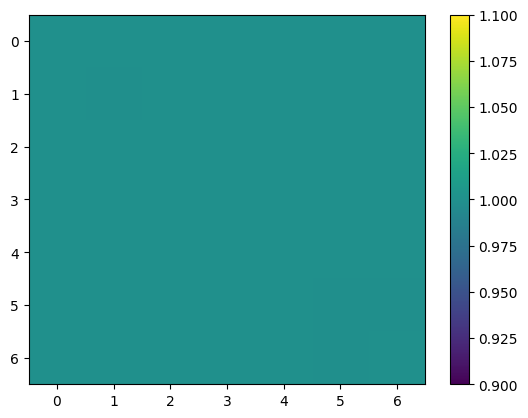

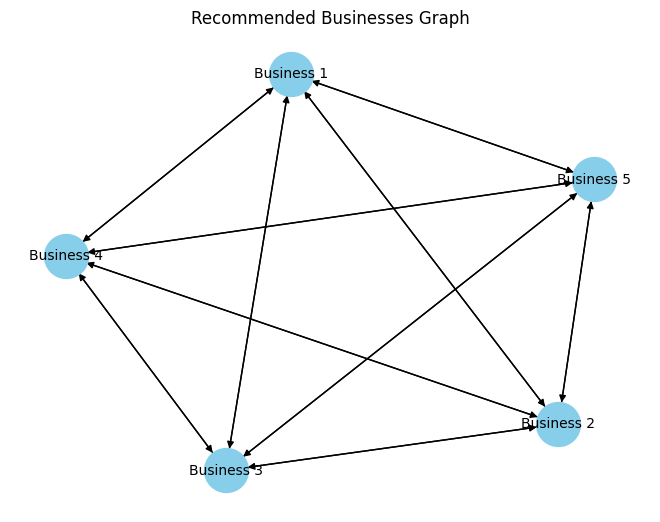

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_recommendations(Recommend):
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes for recommended businesses
    G.add_nodes_from(Recommend)

    # Add edges between businesses based on similarity (you may customize this based on your specific similarity metric)
    for bus1 in Recommend:
        for bus2 in Recommend:
            if bus1 != bus2:
                G.add_edge(bus1, bus2)

    # Draw the graph
    pos = nx.spring_layout(G, seed=42)  # Positioning of nodes
    labels = {node: f'Business {node}' for node in Recommend}
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, font_color='black')

    plt.title(f'Recommended Businesses Graph')
    plt.show()

# Example usage:
USERID = 3  # Replace with the actual USERID
recommended_businesses = recommend(USERID)
visualize_recommendations(recommended_businesses)


